# Kaggle Project

## Describe Your Dataset

### URL: https://www.kaggle.com/datasets/saratchendra/bike-price-prediction

#### Task: Multiple linear regression
- It is a simple way to work on the regression model to find out the important insights of the dataset.
You would probably get to know about the feature importance by using validation techniques like
'Variation Inflation Factor(VIF)'.
Viewing the Data in Visualization.
Comparing the training and test data.

- Correlate multiple bike data with prices

#### Datasets

- Here we are with a dataset contains 10 columns describing the features and 308 rows describing the specifications of bikes.

- Train dataset: 240 row

- Validation dataset: 62 row

#### Features(x):

- (9Columns) unprocessed columns is S.no, Bike_company, Bike_model, Manufactured_year, Engine_warranty, Engine_type, Fuel_type, CC(Cubic capacity), Fuel_Capacity

- (3Columns) Columns that are excluded because they are meaningless : S.no, Bike_company, Bike_model

- (6Columns) Column used for analysis(x) : Manufactured_year, Engine_warranty, Engine_type, Fuel_type, CC(Cubic capacity), Fuel_Capacity

#### Target(y):

- Price Data

# Build Your Model

## Data preprocessing & Model Construction

이번 프로젝트에서 수행 할 패키지를 임포트하고 데이터셋을 로드합니다.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화 - 밀도플롯 그래프를 그리기 위해 import

In [95]:
data = pd.read_excel('./archive/Bike_Price_Prediction.xlsx', sheet_name=0)

In [96]:
data

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000
...,...,...,...,...,...,...,...,...,...,...
303,304,Bgauss,Bgauss B8,2017,3.0,Boxer,Petrol,185CC,19 Litres,81916
304,305,Bgauss,Bgauss Radiator,2017,3.0,Boxer,Petrol,205CC,20 Litres,82666
305,306,Bgauss,Bgauss Razor,2017,3.0,Boxer,Petrol,185CC,21 Litres,83416
306,307,Bgauss,Bgauss Flash,2017,3.0,Boxer,Petrol,205CC,22 Litres,84166


### Data preprocessing

기존 kaggle에서 받아온 오토바이 가격 데이터셋은 구현하려 하는 다중회귀분석에 알맞지 않은 문자열이 존재하여 
모델에 적용할 수 있게 데이터를 전처리 해줍니다.

In [97]:
data=data.drop(columns=['S.no','Bike_company','Bike_model']) #데이터 예측에 의미가 없는 컬럼 삭제
data=data.dropna(axis=0) #데이터 정합성을 위해 데이터가 비워저 있는 행 삭제
data=data[data.Manufactured_year > 2010] #데이터 정합성을 위해 2010년도 이전 데이터행 삭제
data["CC(Cubic capacity)"] = data["CC(Cubic capacity)"].str.replace(pat='CC', repl=r'', regex=True) #CC컬럼의 'CC'가 붙어있는 문자 삭제
data["Fuel_Capacity"] = data["Fuel_Capacity"].str.replace(pat=' Litres', repl=r'', regex=True) #연료컬럼의 붙어있는 문자 삭제
data["Fuel_Capacity"] = data["Fuel_Capacity"].str.replace(pat='Battery', repl='0', regex=True) #연료컬럼의 '배터리'를 '0'으로 변환(Fuel_type에서 전기오토바이는 식별 가능)

In [98]:
data

,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,Single,Petrol,220,10,113000
1,2020,5.0,V-twin,Petrol,120,11,70000
2,2020,5.0,Boxer,Petrol,140,12,85000
3,2020,5.0,Single,Petrol,150,13,90000
4,2020,5.0,V-twin,Petrol,350,14,65000
...,...,...,...,...,...,...,...
303,2017,3.0,Boxer,Petrol,185,19,81916
304,2017,3.0,Boxer,Petrol,205,20,82666
305,2017,3.0,Boxer,Petrol,185,21,83416
306,2017,3.0,Boxer,Petrol,205,22,84166


In [99]:
data['Engine_type'].replace({'Boxer':1, 'Dual Stroke':2, 'Oxidiser-Air inlet':3, 'Single':4, 'Two-Stroke':5, 'V-twin':6},inplace=True)
#해당 엔진타입을 넣고 모델 학습결과 예측값에 상관없이 회귀계수가 나와 해당 데이터 삭제 
data['Fuel_type'].replace({'Petrol':1, 'Electricity':2},inplace=True)
data.dtypes

Manufactured_year       int64
Engine_warranty       float64
Engine_type             int64
Fuel_type               int64
CC(Cubic capacity)     object
Fuel_Capacity          object
Price                   int64
dtype: object

In [100]:
data = data.astype(dtype='int64', errors='ignore') #변경 가능한 data type을 int형으로 변경
data.dtypes

Manufactured_year     int64
Engine_warranty       int64
Engine_type           int64
Fuel_type             int64
CC(Cubic capacity)    int64
Fuel_Capacity         int64
Price                 int64
dtype: object

In [101]:
data

,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5,4,1,220,10,113000
1,2020,5,6,1,120,11,70000
2,2020,5,1,1,140,12,85000
3,2020,5,4,1,150,13,90000
4,2020,5,6,1,350,14,65000
...,...,...,...,...,...,...,...
303,2017,3,1,1,185,19,81916
304,2017,3,1,1,205,20,82666
305,2017,3,1,1,185,21,83416
306,2017,3,1,1,205,22,84166


In [102]:
data = data[['Manufactured_year','Engine_warranty','Engine_type','Fuel_type','CC(Cubic capacity)','Fuel_Capacity','Price']].values
# (기존) xlsx 형식의 데이터를 .values를 통해 -> (변경) array형으로 변환  ,'Engine_type' ->제외

In [103]:
data

array([[  2020,      5,      4, ...,    220,     10, 113000],
       [  2020,      5,      6, ...,    120,     11,  70000],
       [  2020,      5,      1, ...,    140,     12,  85000],
       ...,
       [  2017,      3,      1, ...,    185,     21,  83416],
       [  2017,      3,      1, ...,    205,     22,  84166],
       [  2017,      3,      1, ...,    220,     23,  84916]], dtype=int64)

### Split Data: Train data, Validation Data

In [104]:
train_len = 240 #전체 data의 80% 를 훈련데이터로 사용
train_idxs = np.random.choice(len(data), train_len, replace=False) #index정의
train_data = data[train_idxs] 
#위file data에 index형식에 맞게 뽑아 train_data를 선언(data[].values를 통해 array형식으로 변환하지 않으면 index와 매핑불가)

In [105]:
val_idxs = [idx for idx in range(len(data)) if idx not in train_idxs] #validation Data정의
val_data = data[val_idxs] #validation Data 선언

In [106]:
train_data.shape, val_data.shape

((240, 7), (62, 7))

### Train Model & Select Model

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model_lr = LinearRegression(fit_intercept=True) 
# Loss function is fixed to MSE., fit_intercept를 True로 하면 y절편 값을 구하고, False로 하면 그러지 않는다.

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='squared_error', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=10, #tree의 깊이를 2로 설정
                                 random_state=0) # random state를 '0'으로 설정하여 항상 같 순서의 데이터 사용

In [111]:
models = [model_lr, model_dt] #model_lr 과 model_dt를 배열로 담음(models)

In [112]:
def mse_loss(pre, y):                   #mse loss function정의
    return ((pre-y)**2).mean()

In [113]:
train_data.shape, val_data.shape

((240, 7), (62, 7))

In [114]:
x = train_data[:, 0:6]   # train data를 리스트x로 저장 [0:6 -> 인덱스 0~6까지 즉 '6'번째 인덱스만큼 열로]
y = train_data[:, 6]     # train data를 리스트y로 저장 [ '7열'의 가격 데이터를 종속변수로 설정]

print(x.shape, y.shape)
x, y

(240, 6) (240,)


(array([[2016,    2,    4,    2,  130,    0],
        [2018,    6,    4,    1,  500,   23],
        [2017,   10,    6,    1,  300,   17],
        ...,
        [2019,    4,    1,    1,  205,   15],
        [2020,    5,    6,    1,  350,   14],
        [2020,    4,    5,    1,  500,   32]], dtype=int64),
 array([  65000,  459090,  130000,   69000,   69999,   95000,   67000,
          81916,   81000,   83416,  449090,   89000,  350000,  260099,
          68000,   74000,  155000,   77999,   61000,  232000,   62000,
          74000,   99999,  189000,  195999,   80000,  135000,   61000,
          56700,   76000,  350000,  539090,  106000,   67989,  350000,
         439090,   63599,  150000,   92400,  180000,  150000,   84166,
          89000,   74000,  124500,  219500,  190000,   80000,   97999,
         155000,  990000,   99599,  101000,  103000,   70000,   68000,
         195999,   61568,   73000,   71000,   87999,   63400,   86000,
          64500,  109000,  978999,   82666,  255000,  390

In [115]:
for model in models:
    model.fit(x, y)                    # sklearn의 .fit method를 사용하여 train data로 선언한 x와y를 훈련시킴
    pre = model.predict(x)             # sklearn의 .predict()을 사용하여 훈련에 대한 예측값을 pre에 담음
    
    loss_value = mse_loss(pre, y)      # mse로스를 사용하여 예측값과 실제 label값의 로스를 담음
    
    print(model, loss_value)

LinearRegression() 26878024648.946087
DecisionTreeRegressor(max_depth=10, random_state=0) 182666869.94374338


In [116]:
print(model_lr.coef_) #회귀계수 확인  ex) y= b + m1x1 + m2x2 + ... + mnxn 에서 m1~mn에 해당되는 계수

[ -6211.95631544   4339.30840055  -8275.81868003 102752.41169996
   1052.1154635    7617.50740754]


###  Validate

In [117]:
x_val = val_data[:, 0:6]
y_val = val_data[:, 6]

print(x.shape, y.shape)

(240, 6) (240,)


In [118]:
for model in models:
    
    pre = model.predict(x)
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 26878024648.946087
DecisionTreeRegressor(max_depth=10, random_state=0) 182666869.94374338


In [119]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)  #기울기 와 절편 확인

w: [ -6211.95631544   4339.30840055  -8275.81868003 102752.41169996
   1052.1154635    7617.50740754] , b: 12228577.671130849


In [120]:
model_lr.score(x, y)

0.6935440858019241

In [121]:
model_dt.score(x, y)

0.9979172821160239

In [122]:
model_best = model_dt

### Performance

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22800\959697436.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1 = sns.kdeplot(y, label="y_test", shade='True')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22800\959697436.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(y_val, label='y_val', shade='True')


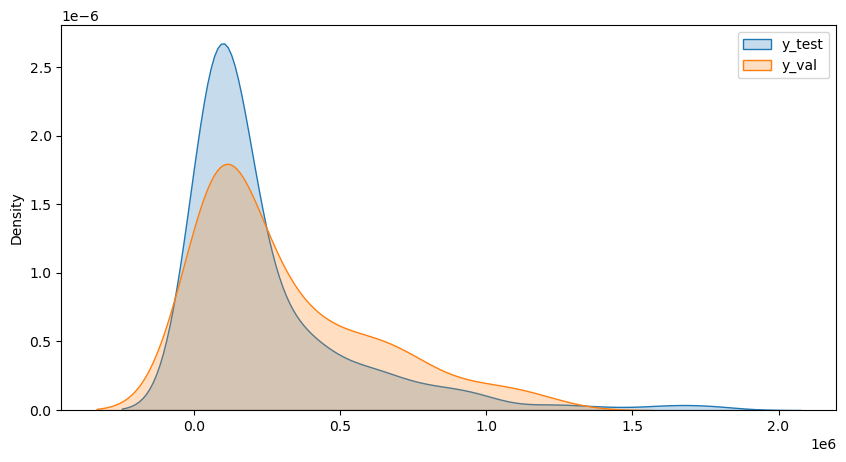

In [123]:
plt.figure(figsize=(10,5))   #그래프 사이즈 조절
ax1 = sns.kdeplot(y, label="y_test", shade='True') 
ax2 = sns.kdeplot(y_val, label='y_val', shade='True')
plt.legend()  #범례표시
plt.show()